# Using Guilleaume 

**Problem**: RFFNet converged to a Kernel. Is it possible to re-use and make it divfree?

**method**:
1. pre-train a vanilla RFFNet
2. use the divfree kernel
3. is the loss function complicated? visualize it!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
from argparse import Namespace
from pathlib import Path
import torch
from pytorch_lightning.trainer import Trainer, seed_everything
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

from turboflow.dataloaders import TurboFlowDataModule
from turboflow.evaluation import compute_all_metrics

from turboflow.utils import phy_utils as phy
from turboflow.utils import torch_utils as tch

In [4]:
seed_everything(42, workers=True)

Global seed set to 42


42

In [5]:
# load dataset
data_dir = Path('/','home','dicarlo_d','Documents','Datasets','Turb2D.hdf5')
dm = TurboFlowDataModule(dataset='Turb2D', 
                         data_dir=data_dir,
                         batch_size=100000,
                         time_idx=33,
                         train_downsampling=32,
                         val_downsampling=32,
                         test_downsampling=16,
                         num_workers=1)
dm.setup()

In [22]:
# choose the hyperparams
hparams = {
    'name':'RFFNet',
    'mlp_layers_num': 3,
    'mlp_layers_dim': 256, 
    'mlp_last_actfn': 'tanh',
    'do_rff': True, 
    'rff_num': 1024, 
    'rff_scale': 10,
    'do_kdivfree': True,
    'kdivfree_epoch': 1000,
    'lam_pde': 0,  # soft constr. grad(u,v)=0
    'lam_div': 0,     # spatial grad(u,v) = torch.autograd(u,v)
    'lam_reg': 0,     # offgrid L2 reg. on grad of the potential
    'lam_sfn': 0,     # offgrid L2 reg. on Sfun
    'lam_spec': 0,    # L2 reg on the spectrum
    'lam_weight': 0,  # L2 reg on the NN's weights
    'sfn_min_x': 0.00784314,
    'sfn_num_centers': 50,
    'sfn_num_increments':3,
    'sfn_patch_dim': 30
}

In [23]:
early_stop_callback = EarlyStopping(monitor='val_loss')
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath=".torch_checkpoints",
    filename="Turb2D-%s-{epoch:02d}-{val_loss:.2f}" % (hparams['name']),
    save_top_k=1,
    mode="min",
)

trainer = Trainer(gpus=1,
                  max_epochs=5000, 
                  log_every_n_steps=20,
                  check_val_every_n_epoch=20, 
                  callbacks=[early_stop_callback,
                             checkpoint_callback])

from turboflow.models.phyrff_khard import plDivFreeRFFNet
model = plDivFreeRFFNet(**vars(Namespace(**hparams)))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [24]:
trainer.fit(model, dm)
trainer.test(model, dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type           | Params
----------------------------------------
0 | rff  | Fourier        | 2.0 K 
1 | f2D  | DivFree2DBasis | 0     
2 | mlp  | MLP            | 337 K 
----------------------------------------
337 K     Trainable params
2.0 K     Non-trainable params
339 K     Total params
1.357     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test/metrics/angular_degree': 19.68513298034668,
 'test/metrics/log_err_specturm': 3.4083027839660645,
 'test/metrics/reconstruction': 0.24562937021255493}
--------------------------------------------------------------------------------


[{'test/metrics/reconstruction': 0.24562937021255493,
  'test/metrics/angular_degree': 19.68513298034668,
  'test/metrics/log_err_specturm': 3.4083027839660645}]

torch.Size([64, 2]) torch.Size([64, 2])
torch.Size([256, 2]) torch.Size([256, 2])
torch.Size([64, 2])
torch.Size([256, 2])


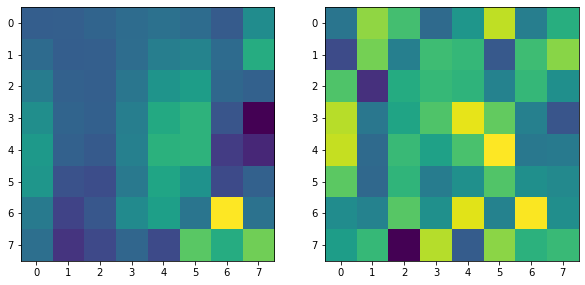

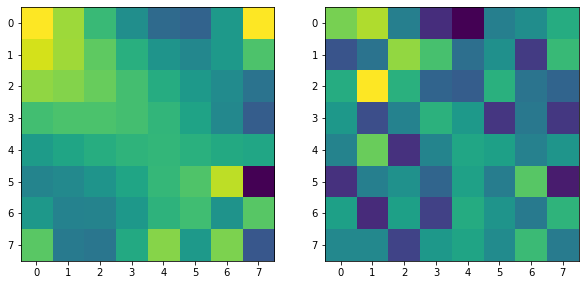

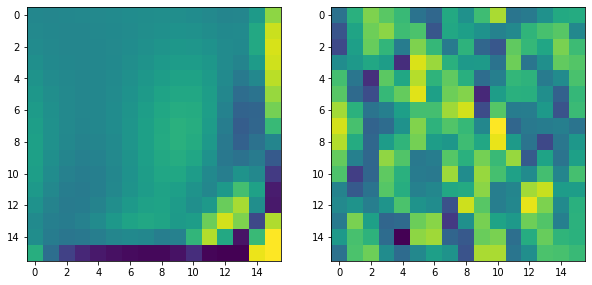

In [25]:
X_lr, y_lr = dm.val_dataset[:]
img_shape_lr = dm.val_dataset.img_shape[:2]
shape_lr = dm.val_dataset.img_shape

X_hr, y_hr = dm.test_dataset[:]
img_shape_hr = dm.test_dataset.img_shape[:2]
shape_hr = dm.test_dataset.img_shape

print(X_lr.shape, y_lr.shape)
print(X_hr.shape, y_hr.shape)

y_hat_lr = model(X_lr)
y_hat_hr = model(X_hr)

print(y_hat_lr.shape)
print(y_hat_hr.shape)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(y_hat_lr[:,0].reshape(*img_shape_lr).detach())
plt.subplot(122)
plt.imshow(y_lr[:,0].reshape(*img_shape_lr).detach())
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(y_hat_lr[:,1].reshape(*img_shape_lr).detach())
plt.subplot(122)
plt.imshow(y_lr[:,1].reshape(*img_shape_lr).detach())
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(y_hat_hr[:,0].reshape(*img_shape_hr).detach())
plt.subplot(122)
plt.imshow(y_hr[:,0].reshape(*img_shape_hr).detach())
plt.show()

In [26]:
x = X_lr[:8,:]
print(model(x))
x = X_hr[:16,:]
print(model(x))

tensor([[-0.0776,  0.2291],
        [-0.0754,  0.1300],
        [-0.0572,  0.0105],
        [-0.0305, -0.1144],
        [-0.0121, -0.2133],
        [-0.0295, -0.2328],
        [-0.0902, -0.0819],
        [ 0.0885,  0.2306]], grad_fn=<TanhBackward>)
tensor([[-0.0776,  0.2291],
        [-0.0787,  0.1826],
        [-0.0754,  0.1300],
        [-0.0680,  0.0722],
        [-0.0572,  0.0105],
        [-0.0442, -0.0528],
        [-0.0305, -0.1144],
        [-0.0188, -0.1698],
        [-0.0121, -0.2133],
        [-0.0145, -0.2376],
        [-0.0295, -0.2328],
        [-0.0581, -0.1857],
        [-0.0902, -0.0819],
        [-0.0844,  0.0780],
        [ 0.0885,  0.2306],
        [ 0.6568,  0.1638]], grad_fn=<TanhBackward>)


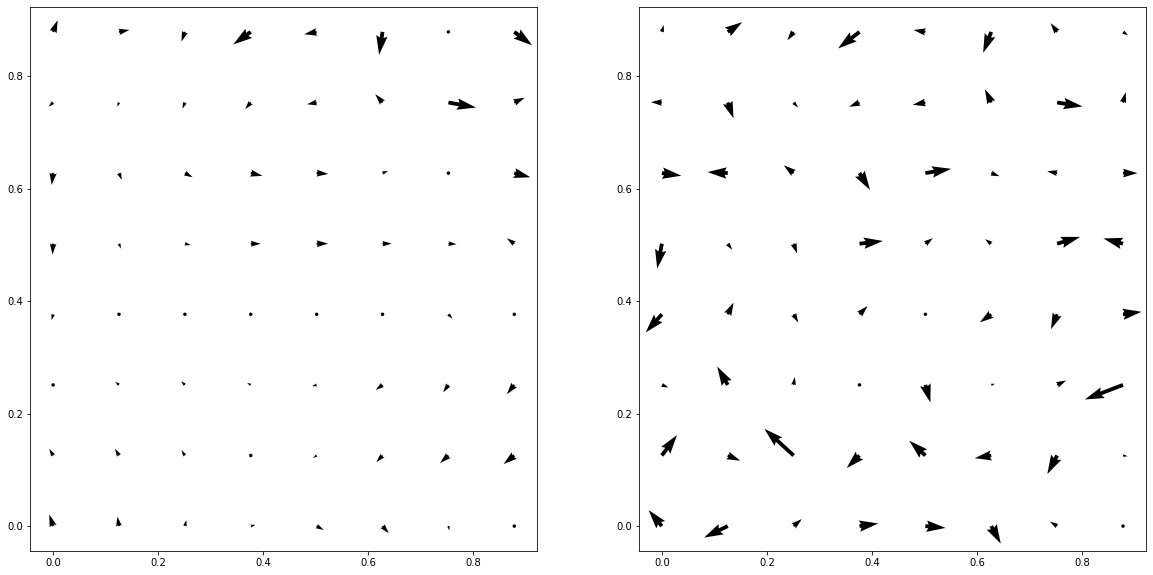

In [27]:
x = X_lr[:,0].detach()
y = X_lr[:,1].detach()
u = y_hat_lr[:,0].detach()
v = y_hat_lr[:,1].detach()

s = 1
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.quiver(x.reshape(*img_shape_lr)[::s,::s], 
           y.reshape(*img_shape_lr)[::s,::s],
           u.reshape(*img_shape_lr)[::s,::s],
           v.reshape(*img_shape_lr)[::s,::s], scale=10)
plt.subplot(122)
plt.quiver(        x.reshape(*img_shape_lr)[::s,::s], 
                   y.reshape(*img_shape_lr)[::s,::s],
           y_lr[:,0].reshape(*img_shape_lr)[::s,::s],
           y_lr[:,1].reshape(*img_shape_lr)[::s,::s], scale=10)

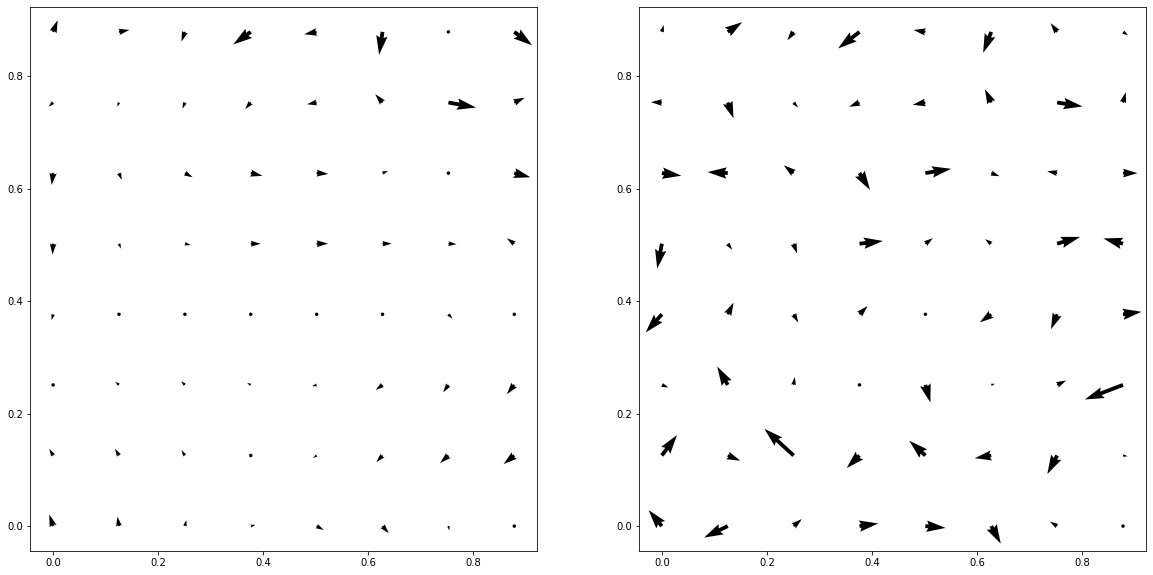

In [28]:
x = X_hr[:,0].detach()
y = X_hr[:,1].detach()
u = y_hat_hr[:,0].detach()
v = y_hat_hr[:,1].detach()

s = 2
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.quiver(x.reshape(*img_shape_hr)[::s,::s], 
           y.reshape(*img_shape_hr)[::s,::s],
           u.reshape(*img_shape_hr)[::s,::s],
           v.reshape(*img_shape_hr)[::s,::s], scale=10)
plt.subplot(122)
plt.quiver(        x.reshape(*img_shape_hr)[::s,::s], 
                   y.reshape(*img_shape_hr)[::s,::s],
           y_hr[:,0].reshape(*img_shape_hr)[::s,::s],
           y_hr[:,1].reshape(*img_shape_hr)[::s,::s], scale=10)

In [29]:
print(compute_all_metrics(y_hat_lr, y_lr))
print(compute_all_metrics(y_hat_hr, y_hr))

{'reconstruction': 0.08113489300012589, 'angular_degree': 13.339993476867676, 'log_err_specturm': 1.8108177185058594}
{'reconstruction': 0.24562937021255493, 'angular_degree': 19.685131072998047, 'log_err_specturm': 3.4083011150360107}


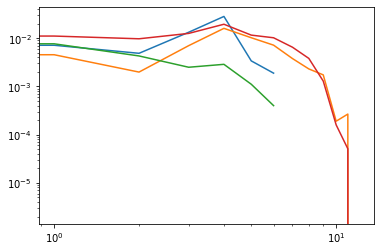

In [30]:
# compute spectrum
spec_cat = phy.energy_spectrum(torch.randn(*shape_hr).permute(2,0,1))[0]
spec_ns = phy.energy_spectrum(torch.randn(*shape_hr).permute(2,0,1))[0]
spec_lr = phy.energy_spectrum(y_lr.view(*shape_lr).permute(2,0,1))[0]
spec_hr = phy.energy_spectrum(y_hr.view(*shape_hr).permute(2,0,1))[0]

spec_lr_pred = phy.energy_spectrum(y_hat_lr.view(*shape_lr).permute(2,0,1))[0]
spec_hr_pred = phy.energy_spectrum(y_hat_hr.view(*shape_hr).permute(2,0,1))[0]

# plt.loglog(spec_ns)
plt.loglog(spec_lr)
plt.loglog(spec_hr)
plt.loglog(spec_lr_pred.detach())
plt.loglog(spec_hr_pred.detach())

In [ ]:
# spec error
spec_log_error_lr = torch.norm(torch.log(spec_lr_pred+1e-20) - torch.log(spec_lr+1e-20))**2
spec_log_error_hr = torch.norm(torch.log(spec_hr_pred+1e-20) - torch.log(spec_hr+1e-20))**2

print(spec_error_lr.item())
print(spec_error_hr.item())

In [ ]:
# angular error
def ang_error(x, x_ref, avg=True):
    assert x.shape == x_ref.shape
    assert x.shape[1] == 2
    N = x.shape[0]
    
    w1 = torch.cat([x, torch.ones(x.shape[0], 1)], dim=1)
    w2 = torch.cat([x_ref, torch.ones(x_ref.shape[0], 1)], dim=1)
    
    err = torch.sum(w1 * w2, dim=1) / (torch.norm(w1, dim=1) * torch.norm(w2, dim=1))
    assert err.sum() < N
    err = torch.rad2deg(torch.acos(err))
    if avg:
        return err.mean()
    return err
    

ang_err_lr = ang_error(y_lr, y_hat_lr, avg=True)
ang_err_hr = ang_error(y_hr, y_hat_hr, avg=True)

print(torch.max(ang_error(y_lr, y_hat_lr, avg=False)))
print(torch.max(ang_error(y_hr, y_hat_hr, avg=False)))


In [ ]:
model = plDivFreeRFFNet.load_from_checkpoint(checkpoint_callback.best_model_path)
trainer.test(model, dm)

In [ ]:
spec_lr_err = phy.energy_spectrum(((y_hat_lr-y_lr)**2).view(*img_shape_lr).permute(2,0,1))[0]
spec_hr_err = phy.energy_spectrum(((y_hat_hr-y_hr)**2).view(*img_shape_hr).permute(2,0,1))[0]

plt.loglog(spec_lr_err.detach())
plt.loglog(spec_hr_err.detach())

In [ ]:
y_hat, Py_hat = model(X_lr)
u, v = torch.split(y_hat,1,-1)
du_xy = torch.autograd.grad(u, X_lr, torch.ones_like(u), create_graph=True)[0]       
dv_xy = torch.autograd.grad(v, X_lr, torch.ones_like(v), create_graph=True)[0]
# div_autograd = du_xy[...,0] + dv_xy[...,1]
div_autograd = dv_xy[...,1]
div_autograd = div_autograd.view(*img_shape_lr[:2])

plt.imshow(div_autograd.detach())
plt.colorbar()
plt.show()

du_x = tch._my_field_grad(y_hat.view(*img_shape_lr)[:,:,0], 1)
du_y = tch._my_field_grad(y_hat.view(*img_shape_lr)[:,:,1], 0)
div_numerical = du_y
    
plt.imshow(div_numerical.detach())
plt.colorbar()
plt.show()

plt.imshow((div_numerical - div_autograd).detach())
plt.colorbar()
plt.show()


In [ ]:
y_hat, Py_hat = model(X_hr)
u, v = torch.split(y_hat,1,-1)
du_xy = torch.autograd.grad(u, X_hr, torch.ones_like(u), create_graph=True)[0]       
dv_xy = torch.autograd.grad(v, X_hr, torch.ones_like(v), create_graph=True)[0]
# div_autograd = du_xy[...,0] + dv_xy[...,1]
div_autograd = dv_xy[...,1]
div_autograd = div_autograd.view(*img_shape_hr[:2])

plt.imshow(div_autograd[2:-2,2:-2].detach())
plt.colorbar()
plt.show()

du_x = tch._my_field_grad(y_hat.view(*img_shape_hr)[:,:,0], 1)
du_y = tch._my_field_grad(y_hat.view(*img_shape_hr)[:,:,1], 0)
div_numerical = du_y
    
plt.imshow(div_numerical[2:-2,2:-2].detach())
plt.colorbar()
plt.show()

plt.imshow((div_numerical[2:-2,2:-2] - div_autograd[2:-2,2:-2]).detach())
plt.colorbar()
plt.show()
